# Assessment of Potential Threat

### Importing

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

### Reading Data

In [2]:
features = ["ID", "Flow ID", "Source IP", "Source Port", "Destination IP", "Destination Port", "Protocol", "Timestamp", "Flow Duration", 
            "Total Fwd Packets", "Total Backward Packets", "Total Length of Fwd Packets", "Total Length of Bwd Packets", 
            "Fwd Packet Length Max", "Fwd Packet Length Min", "Fwd Packet Length Mean", "Fwd Packet Length Std", "Bwd Packet Length Max", 
            "Bwd Packet Length Min", "Bwd Packet Length Mean", "Bwd Packet Length Std", "Flow Bytes/s", "Flow Packets/s", "Flow IAT Mean", 
            "Flow IAT Std", "Flow IAT Max", "Flow IAT Min", "Fwd IAT Total", "Fwd IAT Mean", "Fwd IAT Std", "Fwd IAT Max", "Fwd IAT Min", 
            "Bwd IAT Total", "Bwd IAT Mean", "Bwd IAT Std", "Bwd IAT Max", "Bwd IAT Min", "Fwd PSH Flags", "Bwd PSH Flags", "Fwd URG Flags", 
            "Bwd URG Flags", "Fwd Header Length", "Bwd Header Length", "Fwd Packets/s", "Bwd Packets/s", "Min Packet Length", 
            "Max Packet Length", "Packet Length Mean", "Packet Length Std", "Packet Length Variance", "FIN Flag Count", "SYN Flag Count", 
            "RST Flag Count", "PSH Flag Count", "ACK Flag Count", "URG Flag Count", "CWE Flag Count", "ECE Flag Count", "Down/Up Ratio", 
            "Average Packet Size", "Avg Fwd Segment Size", "Avg Bwd Segment Size", "Fwd Header Length.1", "Fwd Avg Bytes/Bulk", 
            "Fwd Avg Packets/Bulk", "Fwd Avg Bulk Rate", "Bwd Avg Bytes/Bulk", "Bwd Avg Packets/Bulk", "Bwd Avg Bulk Rate", 
            "Subflow Fwd Packets", "Subflow Fwd Bytes", "Subflow Bwd Packets", "Subflow Bwd Bytes", "Init_Win_bytes_forward", 
            "Init_Win_bytes_backward", "act_data_pkt_fwd","min_seg_size_forward", "Active Mean", "Active Std", "Active Max", "Active Min", 
            "Idle Mean", "Idle Std", "Idle Max", "Idle Min", "SimillarHTTP", "Inbound", "Label"]
test_features = ["ID", "Flow ID", "Source IP", "Source Port", "Destination IP", "Destination Port", "Protocol", "Timestamp", "Flow Duration", 
            "Total Fwd Packets", "Total Backward Packets", "Total Length of Fwd Packets", "Total Length of Bwd Packets", 
            "Fwd Packet Length Max", "Fwd Packet Length Min", "Fwd Packet Length Mean", "Fwd Packet Length Std", "Bwd Packet Length Max", 
            "Bwd Packet Length Min", "Bwd Packet Length Mean", "Bwd Packet Length Std", "Flow Bytes/s", "Flow Packets/s", "Flow IAT Mean", 
            "Flow IAT Std", "Flow IAT Max", "Flow IAT Min", "Fwd IAT Total", "Fwd IAT Mean", "Fwd IAT Std", "Fwd IAT Max", "Fwd IAT Min", 
            "Bwd IAT Total", "Bwd IAT Mean", "Bwd IAT Std", "Bwd IAT Max", "Bwd IAT Min", "Fwd PSH Flags", "Bwd PSH Flags", "Fwd URG Flags", 
            "Bwd URG Flags", "Fwd Header Length", "Bwd Header Length", "Fwd Packets/s", "Bwd Packets/s", "Min Packet Length", 
            "Max Packet Length", "Packet Length Mean", "Packet Length Std", "Packet Length Variance", "FIN Flag Count", "SYN Flag Count", 
            "RST Flag Count", "PSH Flag Count", "ACK Flag Count", "URG Flag Count", "CWE Flag Count", "ECE Flag Count", "Down/Up Ratio", 
            "Average Packet Size", "Avg Fwd Segment Size", "Avg Bwd Segment Size", "Fwd Header Length.1", "Fwd Avg Bytes/Bulk", 
            "Fwd Avg Packets/Bulk", "Fwd Avg Bulk Rate", "Bwd Avg Bytes/Bulk", "Bwd Avg Packets/Bulk", "Bwd Avg Bulk Rate", 
            "Subflow Fwd Packets", "Subflow Fwd Bytes", "Subflow Bwd Packets", "Subflow Bwd Bytes", "Init_Win_bytes_forward", 
            "Init_Win_bytes_backward", "act_data_pkt_fwd","min_seg_size_forward", "Active Mean", "Active Std", "Active Max", "Active Min", 
            "Idle Mean", "Idle Std", "Idle Max", "Idle Min", "SimillarHTTP", "Inbound"]

In [3]:
train_dataset = pd.read_csv('traindata.csv', names = features, skiprows = 1, parse_dates=True)
train_dataset.drop(['ID', "Flow ID", "Source IP","Destination IP", 'Timestamp', 'SimillarHTTP'], axis = 1, inplace = True)
train_dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
train_dataset.fillna(train_dataset.mean(), inplace = True)

test_dataset = pd.read_csv('testdata.csv', names = test_features, skiprows = 1, parse_dates=True)
test_dataset.drop(['ID', "Flow ID", "Source IP","Destination IP", 'Timestamp', 'SimillarHTTP'], axis = 1, inplace = True)
test_dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
test_dataset.fillna(test_dataset.mean(), inplace = True)


In [4]:
xdata = train_dataset.drop(['Label'], axis = 1)
ydata = train_dataset['Label']

### Exploring

In [5]:
# Make sure that all Na values are disappeared

print(train_dataset.isnull().values.any())
print(test_dataset.isnull().values.any())

False
False


0    125164
1     11247
Name: Label, dtype: int64


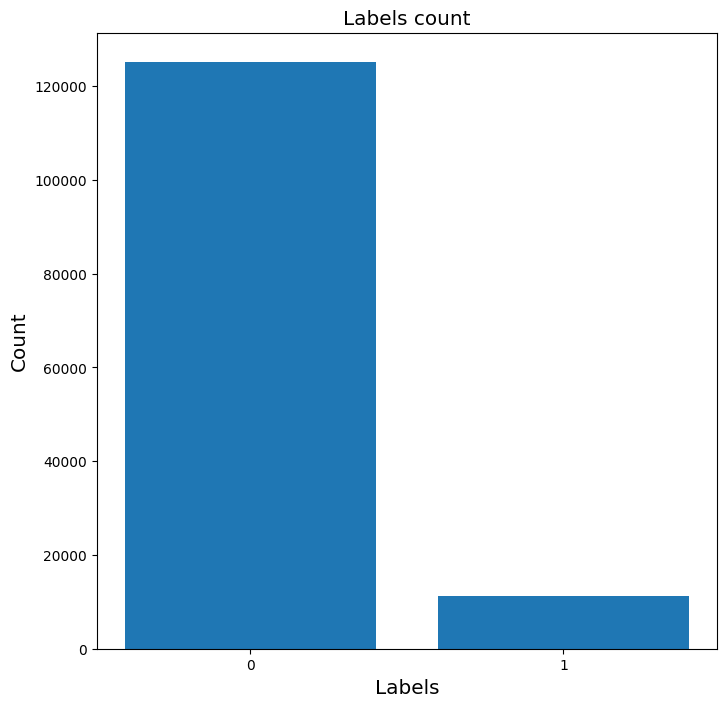

In [6]:
# Check for imbalance in data

print(train_dataset['Label'].value_counts())
fig, ax = plt.subplots(figsize=(8, 8))
plt.bar(['0', '1'], train_dataset['Label'].value_counts())
plt.title('Labels count', fontsize = 'x-large')
plt.ylabel('Count', fontsize = 'x-large')
plt.xlabel('Labels', fontsize = 'x-large')
plt.show()

In [17]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 3.5 MB/s eta 0:00:0000:0100:01


In [7]:
import shap
from catboost import CatBoostClassifier

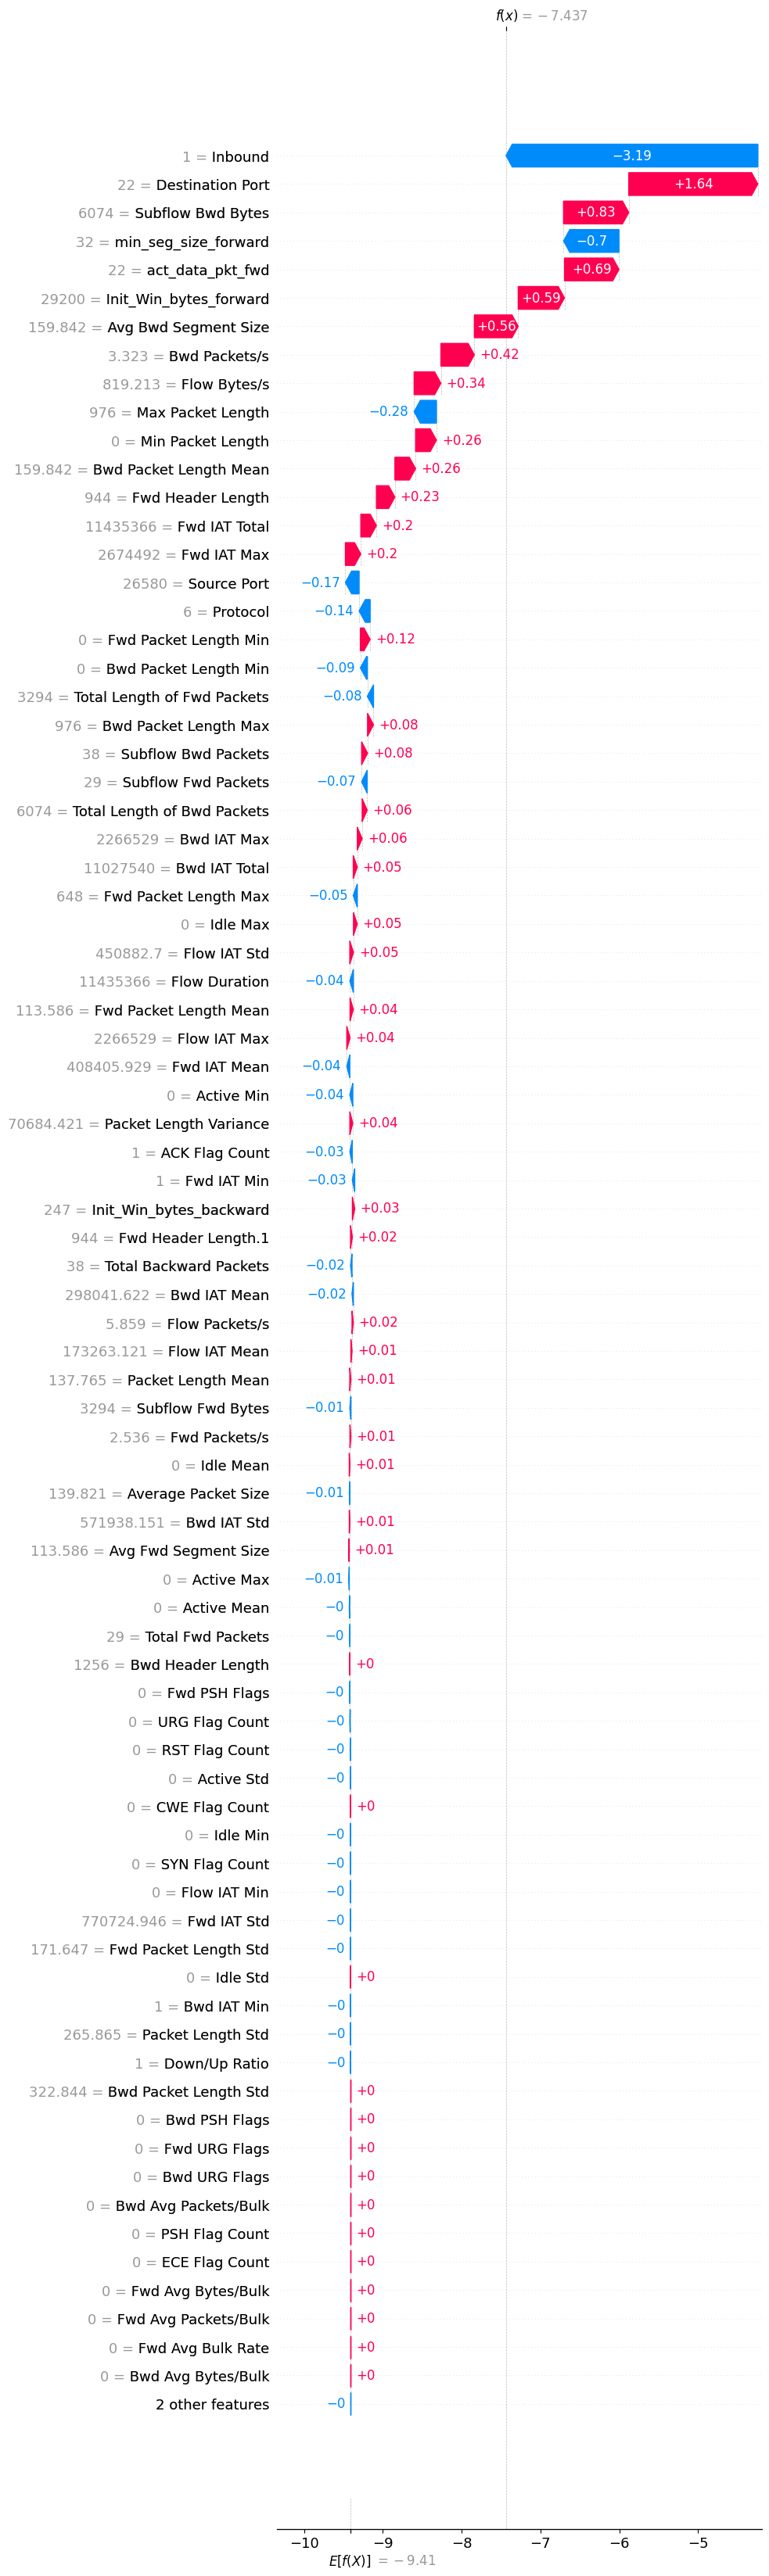

In [8]:
# choosing the model
model = CatBoostClassifier(iterations = 500, learning_rate = 0.05, eval_metric = 'F1', verbose = False, random_state = 42, devices='0:1')
model.fit(xdata, ydata, verbose=False,  plot=False)

# implementing shap on the model 
explainer = shap.Explainer(model)
shap_values = explainer(xdata)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0], max_display = 80)

In [9]:
# Columns based on shap 
xdata = train_dataset[["Inbound", "Init_Win_bytes_forward", "act_data_pkt_fwd", "Destination Port", "Bwd Packet Length Max", "Source Port", "Fwd Packet Length Min", "Total Length of Bwd Packets", "Min Packet Length", 
"Bwd Packet Length Mean", "min_seg_size_forward",  "Down/Up Ratio", "Fwd Header Length", "Bwd Packet Length Min", "Bwd Packets/s",  "Fwd Header Length.1", "Flow Duration", 
"Subflow Bwd Bytes", "Total Fwd Packets"]]
ydata = train_dataset['Label']
xtest = test_dataset[["Inbound", "Init_Win_bytes_forward", "act_data_pkt_fwd", "Destination Port", "Bwd Packet Length Max", "Source Port", "Fwd Packet Length Min", "Total Length of Bwd Packets", "Min Packet Length", 
"Bwd Packet Length Mean", "min_seg_size_forward",  "Down/Up Ratio", "Fwd Header Length", "Bwd Packet Length Min", "Bwd Packets/s",  "Fwd Header Length.1", "Flow Duration", 
"Subflow Bwd Bytes", "Total Fwd Packets"]]

## Training Models

#### Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

def model_Randomforest( nEst, x_train, y_train, x_test):
    model = RandomForestClassifier(n_estimators = nEst, bootstrap = False, max_depth = None, 
                                   max_features = 'auto', random_state = 50)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    return y_pred


y_pred = model_Randomforest(1000, xdata, ydata, xtest)

#### XGBoost

In [11]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier(learning_rate = 0.1, n_estimators = 5000, tree_method = 'hist')
model_xgb.fit(xdata, ydata)
y_pred = model_xgb.predict(xtest)

#### LGBM

In [12]:
from lightgbm.sklearn import LGBMClassifier 
model = LGBMClassifier(objective = 'binary', boosting_type = 'rf', learning_rate = 0.5, n_estimators = 2000, 
                       bagging_freq = 30, bagging_fraction = 0.9)
model.fit(xdata, ydata)
y_pred = model.predict(xtest)

[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=30, subsample_freq=0 will be ignored. Current value: bagging_freq=30


#### catboost

In [13]:
model = CatBoostClassifier(iterations = 1000, learning_rate = 0.01, eval_metric = 'F1', verbose = False, random_state = 50, devices='0:1')
# model = CatBoostClassifier(iterations = 1000, learning_rate = 0.01, eval_metric = 'F1', verbose = False, random_state = 50, task_type="GPU", devices='0:1')
model.fit(xdata, ydata, verbose=False)
y_pred = model.predict(xtest)

## Submission file

In [14]:
submission_file = pd.DataFrame({'ID': range(0,101500), 'Class': y_pred})
submission_file = submission_file.to_csv('Submission.csv',index=False)